<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB1/blob/main/6351071072_LAB1_BAI2_Trang30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Bài 1 trang 30
print("Nguyễn Đức Trung _ 6351071072")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

column_names = ['id', 'device_id', 'co_level', 'humidity', 'temperature', 'time']
df = pd.read_excel('tb_tracking.xlsx', header=None, names=column_names)
print("--- 5 dòng đầu tiên ---")
print(df.head())
print("\n--- Thông tin tổng quan ---")
df.info()
print("\n--- Thống kê mô tả ---")
print(df.describe())

Nguyễn Đức Trung _ 6351071072
--- 5 dòng đầu tiên ---
    id  device_id  co_level  humidity  temperature                time
0  1.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:29
1  2.0        1.0       2.0       3.0          4.0 2016-12-20 12:52:31
2  3.0      100.0       2.0       3.0          4.0 2016-12-20 12:52:35
3  4.0      100.0       2.0       3.0        400.0 2016-12-20 12:52:37
4  5.0        1.0       2.0       3.0          4.0 2016-12-20 13:02:01

--- Thông tin tổng quan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33340 entries, 0 to 33339
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           33339 non-null  float64       
 1   device_id    33339 non-null  float64       
 2   co_level     33339 non-null  float64       
 3   humidity     33339 non-null  float64       
 4   temperature  33339 non-null  float64       
 5   time         33339 non-null  dateti

In [ ]:
#Câu 2 trang 30
print("Nguyễn Đức Trung _ 6351071072")
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending=False) * 100
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

print("--- Thống kê giá trị rỗng ---")
print(missing_data.head())

Nguyễn Đức Trung _ 6351071072
--- Thống kê giá trị rỗng ---
             Total   Percent
id               1  0.002999
device_id        1  0.002999
co_level         1  0.002999
humidity         1  0.002999
temperature      1  0.002999


Nguyễn Đức Trung _ 6351071072


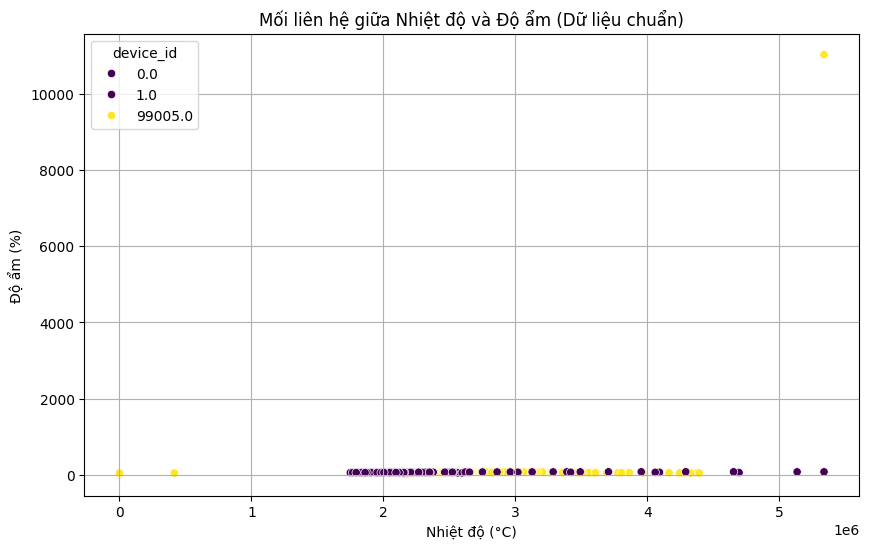

In [ ]:
#câu 3 trang 30
print("Nguyễn Đức Trung _ 6351071072")
df['time'] = pd.to_datetime(df['time'], dayfirst=True)
df_plot = df[df['time'] >= '2018-01-03']
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temperature', y='humidity', data=df_plot, hue='device_id', palette='viridis')

plt.title('Mối liên hệ giữa Nhiệt độ và Độ ẩm (Dữ liệu chuẩn)')
plt.xlabel('Nhiệt độ (°C)')
plt.ylabel('Độ ẩm (%)')
plt.grid(True)
plt.show()

Nguyễn Đức Trung _ 6351071072


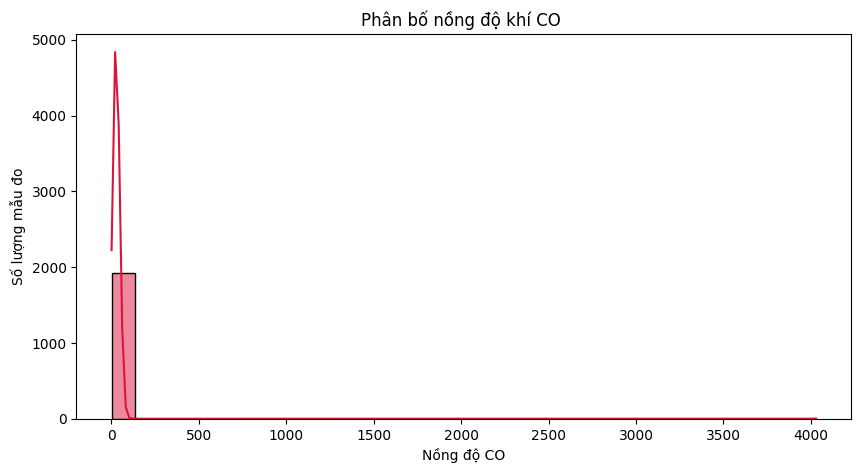

In [ ]:
#câu 4
print("Nguyễn Đức Trung _ 6351071072")

plt.figure(figsize=(10, 5))
sns.histplot(df_plot['co_level'], kde=True, color='crimson', bins=30)

plt.title('Phân bố nồng độ khí CO ')
plt.xlabel('Nồng độ CO')
plt.ylabel('Số lượng mẫu đo')
plt.show()

In [ ]:
#câu 5
print("Nguyễn Đức Trung _ 6351071072")

df['time'] = pd.to_datetime(df['time'], dayfirst=True)
df['minutes'] = df['time'].dt.hour * 60 + df['time'].dt.minute

print("--- Dữ liệu sau khi thêm cột minutes ---")
print(df[['time', 'minutes']].head())

Nguyễn Đức Trung _ 6351071072
--- Dữ liệu sau khi thêm cột minutes ---
                 time  minutes
0 2016-12-20 12:52:29    772.0
1 2016-12-20 12:52:31    772.0
2 2016-12-20 12:52:35    772.0
3 2016-12-20 12:52:37    772.0
4 2016-12-20 13:02:01    782.0


Nguyễn Đức Trung
Đã lọc bỏ 31422 dòng dữ liệu nhiễu.


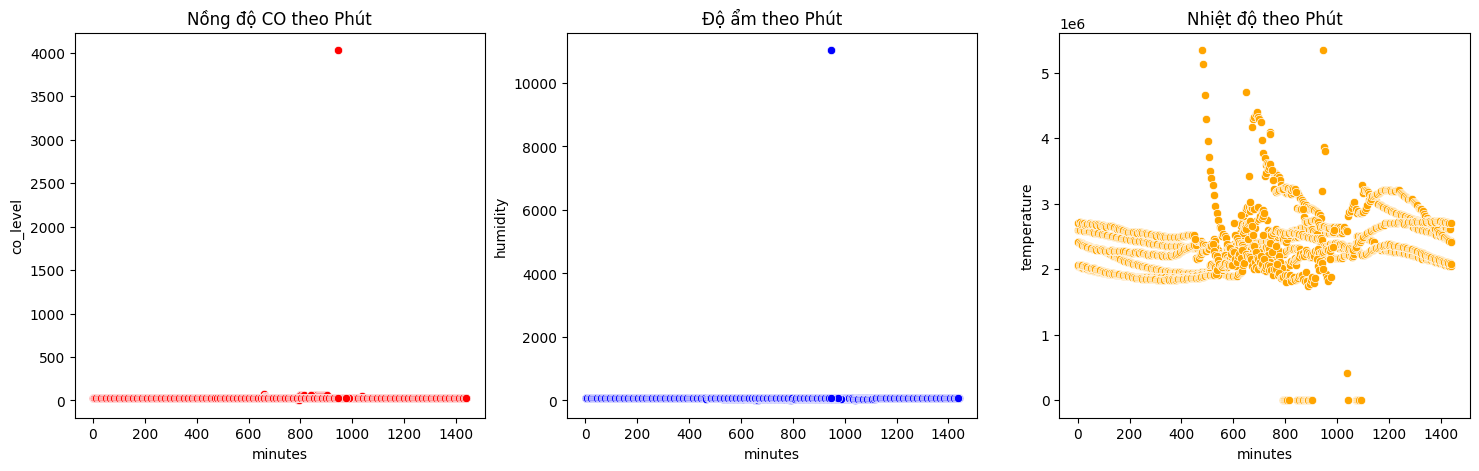

In [ ]:
#Câu 6
print("Nguyễn Đức Trung")
df_clean = df[df['time'] >= '2018-01-03'].copy()
print(f"Đã lọc bỏ {len(df) - len(df_clean)} dòng dữ liệu nhiễu.")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.scatterplot(ax=axes[0], x='minutes', y='co_level', data=df_clean, color='red')
axes[0].set_title('Nồng độ CO theo Phút')
sns.scatterplot(ax=axes[1], x='minutes', y='humidity', data=df_clean, color='blue')
axes[1].set_title('Độ ẩm theo Phút')
sns.scatterplot(ax=axes[2], x='minutes', y='temperature', data=df_clean, color='orange')
axes[2].set_title('Nhiệt độ theo Phút')

plt.show()